StimulationDevice class demonstration
=====================================

Assumptions:
- This is intended to function as a generic device class for multiprimary stimulators. 
- devices are additive
- calibration is stationary
- expect values as W/m2/nm

In [1]:
import sys
sys.path.insert(0, '../')
import random

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from silentsub.device import StimulationDevice
from silentsub import colorfunc

sns.set_context('notebook')
sns.set_style('whitegrid')

Load data with pandas -- this is our starting point
---------------------------------------------------

In [2]:
spds = pd.read_csv('../data/S2_corrected_oo_spectra.csv', index_col=['led','intensity'])
spds.index.rename(['Primary', 'Setting'], inplace=True)
spds.columns = pd.Int64Index(spds.columns.astype(int))
spds.columns.name = 'Wavelength'
spds = spds.sort_index()
spds

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        195      0.000026  0.000017  0.000041  0.000015  0.000036  0.000039   
        260      0.000141  0.000147  0.000168  0.000170  0.000155  0.000144   
...                   ...       ...       ...       ...       ...       ...   
9       3835     0.003609  0.004056  0.003476  0.003724  0.002943  0.003147   
        3900     0.003415  0.003666  0.003451  0.003724  0.002873  0.003021   
        3965     0.003560  0.003867  0.003539  0.003874  0.003191  0.003165   
        4030     0.003738  0.003652  0.003557  0.003737  0.002973  0.003205   
        4095     0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        195      0.000022  0.000032  0.000026  0.000021  ...  0.000022   
        260      0.000154  0.000121  0.000167  0.000169  ...  0.000088   
...                   ...       ...       ...       ...  ...       ...   
9       3835     0.003482  0.002543  0.003630  0.004153  ...  0.002318   
        3900     0.003112  0.002289  0.003514  0.004000  ...  0.002279   
        3965     0.003544  0.002428  0.003695  0.004005  ...  0.002134   
        4030     0.003420  0.002227  0.003520  0.003932  ...  0.002444   
        4095     0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength                772       773       774       775       776  \
Primary Setting                                                         
0       0        0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        65       0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        130      0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        195      5.119073e-07  0.000008  0.000009  0.000000  0.000015   
        260      7.298278e-05  0.000088  0.000081  0.000071  0.000086   
...                       ...       ...       ...       ...       ...   
9       3835     2.590713e-03  0.002629  0.002536  0.002962  0.002583   
        3900     2.669694e-03  0.002370  0.002300  0.002815  0.002574   
        3965     2.682856e-03  0.002604  0.002552  0.002775  0.002638   
        4030     2.647269e-03  0.002541  0.002408  0.002702  0.002547   
        4095     2.544598e-03  0.002587  0.002493  0.002923  0.002699   

Wavelength            777       778       779       780  
Primary Setting                                          
0       0        0.000000  0.000011  0.000000  0.000000  
        65       0.000000  0.000000  0.000000  0.000000  
        130      0.000000  0.000000  0.000000  0.000000  
        195      0.000012  0.000000  0.000018  0.000000  
        260      0.000086  0.000010  0.000100  0.000078  
...                   ...       ...       ...       ...  
9       3835     0.002606  0.002213  0.002467  0.002924  
        3900     0.002412  0.002107  0.002590  0.002938  
        3965     0.002748  0.002137  0.002676  0.002664  
        4030     0.002385  0.002038  0.002477  0.002837  
        4095     0.002592  0.002177  0.002471  0.002698  

[640 rows x 401 columns]

Instantiate `StimulationDevice` class
-------------------------------------

In [3]:
# list of colors for the primaries
colors = ['blueviolet', 'royalblue', 'darkblue', 'blue', 'cyan', 
          'green', 'lime', 'orange', 'red', 'darkred']

# instantiate the class
device = StimulationDevice(
    resolutions=[4095]*10,
    colors=colors,
    spds=spds,
    spd_binwidth=1
)

Plot the SPDs
-------------

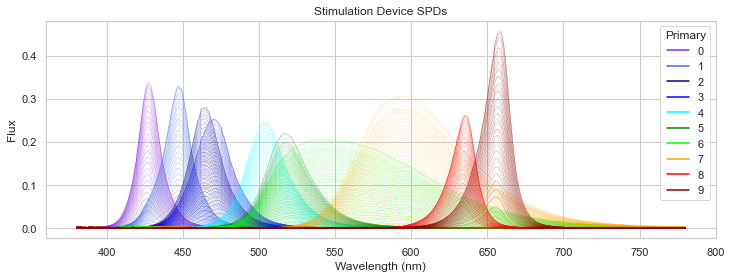

In [4]:
_ = device.plot_spds()

Plot the gamut of the device on CIE 1931 horseshoe
--------------------------------------------------

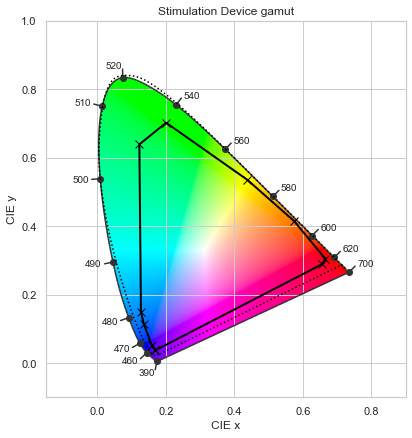

In [5]:
_ = device.plot_gamut()

fig = device.plot_spds()Predict output for a specific primary at a given setting
--------------------------------------------------------

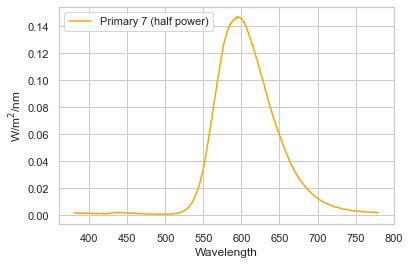

In [6]:
primary_spd = device.predict_primary_spd(
    primary=7, 
    setting=.5, 
    name='Primary 7 (half power)'
)
primary_spd.plot(legend=True, ylabel='W/m$^2$/nm', color=device.colors[7]);

Predict output for random device settings
-----------------------------------------

Predicted output for device settings: [2474, 388, 1150, 1931, 1004, 2913, 802, 1300, 2355, 63]


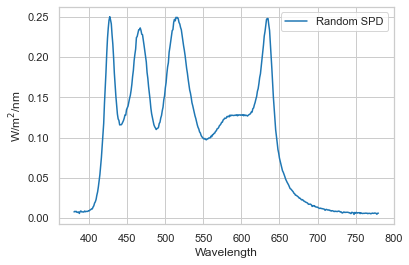

In [7]:
settings = [random.randrange(s) for s in device.resolutions] # Using a list of integers
device_spd = device.predict_multiprimary_spd(settings, 'Random SPD')
device_spd.plot(legend=True, ylabel='W/m$^2$/nm');
print(f'Predicted output for device settings: {settings}')

Predicted output for device settings: [0.6041514041514041, 0.09474969474969475, 0.28083028083028083, 0.47155067155067154, 0.24517704517704517, 0.7113553113553114, 0.19584859584859585, 0.31746031746031744, 0.575091575091575, 0.015384615384615385]


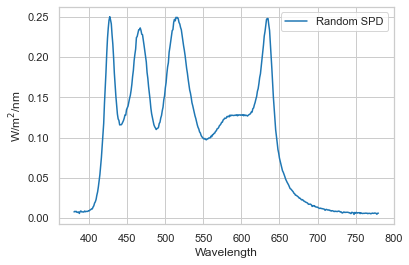

In [8]:
weights = device.settings_to_weights(settings) # Convert settings to float
device_spd = device.predict_multiprimary_spd(weights, 'Random SPD')
device_spd.plot(legend=True, ylabel='W/m$^2$/nm');
print(f'Predicted output for device settings: {weights}')

Predict *a*-opic irradiances for a list of device settings and plot with nice colours
--------------------------------------------------------------------------------------

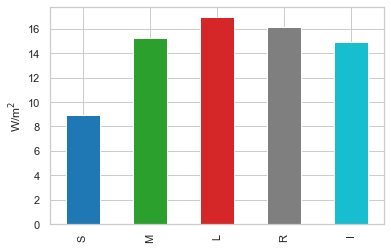

In [9]:
device_ao = device.predict_multiprimary_aopic(settings)
ao_colors = list(device.aopic_colors.values())
device_ao.plot(kind='bar', color=ao_colors, ylabel='W/m$^2$');

Convert settings to weights and weights to settings
---------------------------------------------------

In [10]:
device.settings_to_weights(settings)

[0.6041514041514041,
 0.09474969474969475,
 0.28083028083028083,
 0.47155067155067154,
 0.24517704517704517,
 0.7113553113553114,
 0.19584859584859585,
 0.31746031746031744,
 0.575091575091575,
 0.015384615384615385]

In [11]:
device.weights_to_settings(weights)

[2474, 388, 1150, 1931, 1004, 2913, 802, 1300, 2355, 63]

Find a spectrum based on xy chromaticity coordinates and luminance
------------------------------------------------------------------

basinhopping step 0: f 3.1373e-08
basinhopping step 1: f 6.83861e-10 trial_f 6.83861e-10 accepted 1  lowest_f 6.83861e-10
found new global minimum on step 1 with function value 6.83861e-10
Requested LMS: [ 0.87373966  0.78105552  0.44562936]
Solution LMS: [ 0.873744    0.78102996  0.44562587]


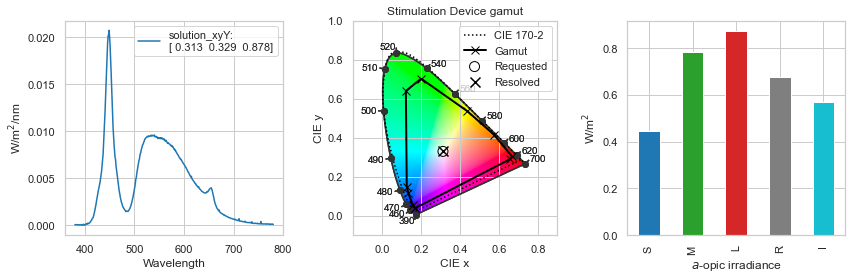

In [71]:
xy = [.3127, .3290]  # D65
luminance = 600.  # Lux
res = device.find_settings_xyY(
    xy=xy, 
    luminance=luminance,
    tolerance=1e-6,
    plot_solution=True,
    verbose=True
)


In [63]:
import numpy as np
arr = np.array([device.predict_primary_spd(val, .5).values for val in range(10)])

In [64]:
arr = np.array([device.predict_primary_spd(val, .5).values for val in range(10)])
arr

array([[ 0.00100039,  0.00108189,  0.00107609, ...,  0.0004115 ,
         0.00055605,  0.00057469],
       [ 0.00113233,  0.00109333,  0.00110209, ...,  0.00050611,
         0.00064828,  0.00067426],
       [ 0.00094721,  0.00091652,  0.00091435, ...,  0.0004487 ,
         0.000583  ,  0.00061462],
       ..., 
       [ 0.00164471,  0.00179308,  0.00170018, ...,  0.00193369,
         0.00201939,  0.00209746],
       [ 0.00130345,  0.00136105,  0.00136035, ...,  0.00074337,
         0.00095321,  0.00098357],
       [ 0.00220586,  0.00223876,  0.00204095, ...,  0.00122152,
         0.00146259,  0.00160548]])

In [65]:
from silentsub.CIE import get_CIES026
vals = get_CIES026().values

In [66]:
arr.shape

(10, 401)

In [67]:
vals.shape

(401, 5)

In [68]:
mat = np.dot(arr, vals)
mat

array([[ 2.46769566,  0.26517753,  0.22002378,  0.7500843 ,  0.92826618],
       [ 3.93128096,  0.6795852 ,  0.47265034,  1.87984171,  2.27553655],
       [ 2.94109016,  1.21441892,  0.77751957,  2.83556529,  3.42940441],
       [ 2.60096274,  1.47057457,  0.94727664,  3.20811976,  3.81014479],
       [ 0.46832449,  3.36716891,  2.52008502,  4.4058881 ,  3.9763025 ],
       [ 0.18815408,  3.57720686,  2.93761357,  3.55768088,  2.73234244],
       [ 0.20529456,  7.43227554,  8.75453671,  4.68884184,  3.04530091],
       [ 0.08258556,  4.3835378 ,  8.20949656,  1.17713473,  0.45443937],
       [ 0.04095765,  0.26817244,  1.27768559,  0.06838186,  0.05215034],
       [ 0.06528882,  0.17312208,  0.92370777,  0.08720901,  0.07914015]])

In [31]:
pinv_mat = np.linalg.pinv(mat)
pinv_mat

array([[  2.00068868e-01,   2.37313454e-01,  -3.57663138e-02,
         -1.09941184e-01,  -1.04663578e-01,   2.89086717e-02,
          5.63634746e-02,  -4.05887956e-02,  -4.96597063e-03,
          7.88734058e-04],
       [ -2.31178403e-01,  -3.98369602e-01,   4.04833500e-01,
          5.25359516e-01,  -7.58463085e-01,  -4.68618392e-01,
          7.35584033e-01,  -1.53512154e-01,  -1.19030334e+00,
         -1.02182509e+00],
       [  5.20687268e-02,   1.15524344e-01,  -1.18672176e-01,
         -1.48587409e-01,   2.69862484e-01,   1.16671319e-01,
         -2.89153928e-01,   2.03116045e-01,   4.89416568e-01,
          4.14373908e-01],
       [  7.13144601e-01,   9.48297848e-01,  -9.54949438e-01,
         -1.30585467e+00,   1.08411036e+00,   1.11626324e+00,
         -6.57279956e-01,  -2.69648755e-01,   1.59590401e+00,
          1.39868213e+00],
       [ -6.81014439e-01,  -8.31380740e-01,   8.16751373e-01,
          1.14945634e+00,  -5.73683697e-01,  -8.29533493e-01,
          2.92098599e-01

In [56]:
new = np.dot(pinv_mat.T, np.array([.2, .2, .2, 0, 0]))
new

array([ 0.00419184, -0.00910636,  0.050079  ,  0.05336618, -0.11865284,
       -0.06460768,  0.10055872,  0.00180302, -0.14117055, -0.12133249])

In [57]:
new

array([ 0.00419184, -0.00910636,  0.050079  ,  0.05336618, -0.11865284,
       -0.06460768,  0.10055872,  0.00180302, -0.14117055, -0.12133249])

In [58]:
[.5 for val in range(10)] + new

array([ 0.50419184,  0.49089364,  0.550079  ,  0.55336618,  0.38134716,
        0.43539232,  0.60055872,  0.50180302,  0.35882945,  0.37866751])

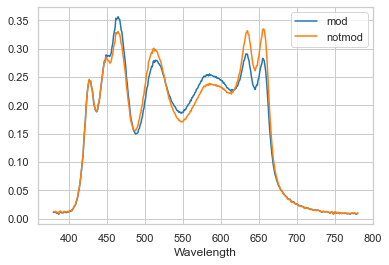

In [59]:
device.predict_multiprimary_spd([.5 for val in range(10)] + new, 'mod').plot(legend=True); 
device.predict_multiprimary_spd([.5 for val in range(10)], 'notmod').plot(legend=True);
